In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.array([1,np.nan,3])
display(A)
np.isnan(A)

array([ 1., nan,  3.])

array([False,  True, False])

In [3]:
import pandas as pd
df = pd.DataFrame(A)
display(df)
df.isnull()

0
0  1.0
1  NaN
2  3.0

0
0  False
1   True
2  False

----------------- 1.0
***************** 0.8187307530779818
+++++++++++++++++ 1.3498588075760032


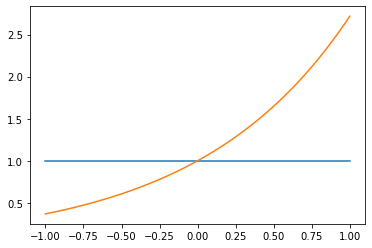

In [4]:
x = np.linspace(-1,1,50)

y = np.exp(x)
print('-----------------',np.exp(0))
print('*****************',np.exp(-0.2))
print('+++++++++++++++++',np.exp(0.3))
plt.plot(x,np.full(50,fill_value=1))
plt.plot(x,y)

# ÊâãÊíï‰ª£Á†Å

In [5]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier

import graphviz
from sklearn import tree

X = np.arange(10).reshape(-1,1) # ‰∫åÁª¥ÔºåÊú∫Âô®Â≠¶‰π†Ë¶ÅÊ±ÇÊï∞ÊçÆÂøÖÈ°ªÊòØ‰∫åÁª¥ÁöÑ

y = np.array([1,1,1,-1,-1,-1,1,1,1,-1])
display(X,y)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

array([ 1,  1,  1, -1, -1, -1,  1,  1,  1, -1])

## ‰ΩøÁî®AdaboostÂª∫Ê®°

In [6]:
# SAMMERË°®Á§∫ÊûÑÂª∫Ê†ëÊó∂ÂÄôÔºåÈááÁî®Áõ∏ÂêåÁöÑË£ÇÂàÜÊñπÂºè
model = AdaBoostClassifier(n_estimators=3,algorithm = 'SAMME')

model.fit(X,y)

y_ = model.predict(X)
display(y,y_) # ÂáÜÁ°ÆÁéáÊòØ100%

array([ 1,  1,  1, -1, -1, -1,  1,  1,  1, -1])

array([ 1,  1,  1, -1, -1, -1,  1,  1,  1, -1])

## Á¨¨‰∏ÄËØæÂèØËßÜÂåñ

Á¨¨‰∏ÄÊ£µÊ†ëÊòØ‰ªÄ‰πàÔºö DecisionTreeClassifier(max_depth=1, random_state=1977272916)


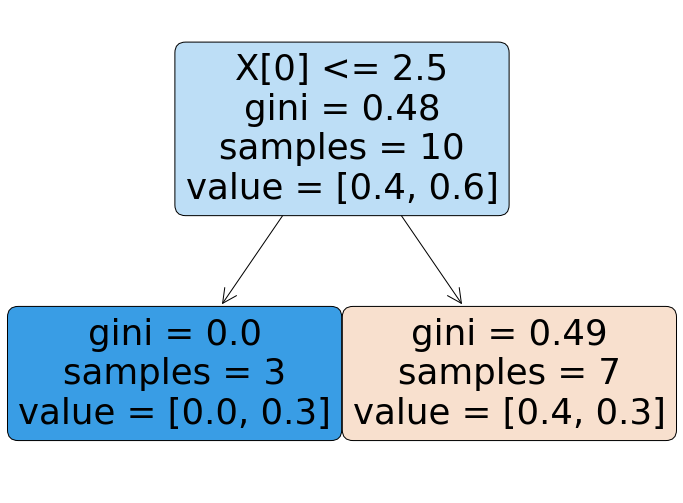

In [7]:
print('Á¨¨‰∏ÄÊ£µÊ†ëÊòØ‰ªÄ‰πàÔºö',model[0])
# dot_data = tree.export_graphviz(model[0],filled=True,rounded=True)
# graphviz.Source(dot_data)
plt.figure(figsize=(12,9))
_ = tree.plot_tree(model[0],filled=True,rounded=True)

## Á¨¨‰∫åÊ£µÊ†ëÂèØËßÜÂåñ

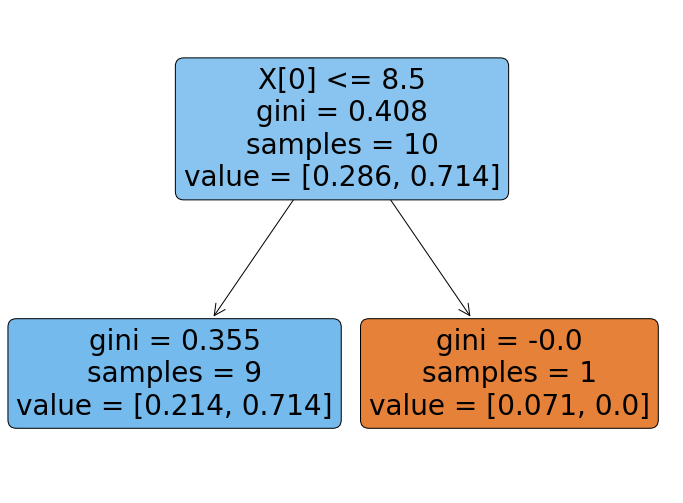

In [8]:
# dot_data = tree.export_graphviz(model[1],filled=True,rounded=True)
# graphviz.Source(dot_data)
plt.figure(figsize=(12,9))
_ = tree.plot_tree(model[1],filled=True,rounded=True)

## Á¨¨‰∏âÊ£µÊ†ëÂèØËßÜÂåñ

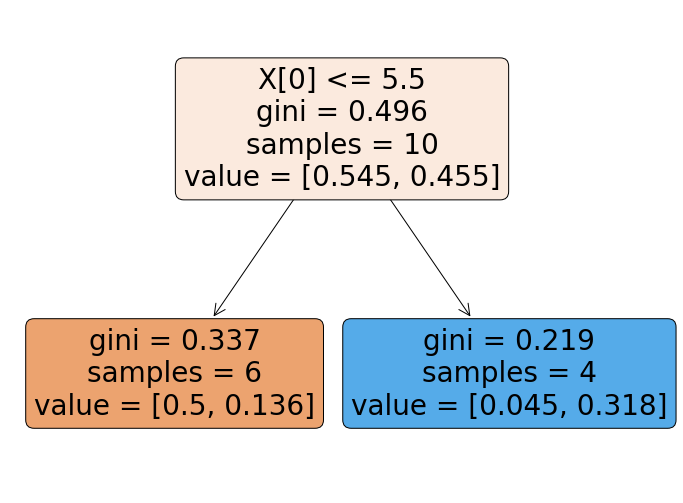

In [9]:
# graphviSourceSource(tree.export_graphviz(model[2],filled=True,rounded=True))
plt.figure(figsize=(12,9))
_ = tree.plot_tree(model[2],filled=True,rounded=True)

# Á¨¨‰∏ÄÊ£µÊ†ë‰ª£Á†ÅÊûÑÂª∫

## giniÁ≥ªÊï∞ËÆ°ÁÆó

ùëîùëñùëõùëñ=‚àëùëñ=1ùëÅùëùùëñ(1‚àíùëùùëñ)

In [10]:
y # 6‰∏™Ê≠£1,4‰∏™-1
# Ê≠£1ÊØî‰æãÊòØ0.6
# Ë¥ü1ÊØî‰æã0.4

array([ 1,  1,  1, -1, -1, -1,  1,  1,  1, -1])

In [11]:
w1 = np.full(shape = 10,fill_value=0.1) # ÂàùÂßãÁöÑÊ†∑Êú¨ÊùÉÈáç

cond = y == 1 # Á±ªÂà´1Êù°‰ª∂
p1 = w1[cond].sum()
p2 = 1- p1
display(p1,p2)

gini1 = p1 * (1-p1) + p2 * (1 - p2)
print('ÊñπÂºè‰∏ÄËÆ°ÁÆóginiÁ≥ªÊï∞Ôºö',gini1)

gini2 = 1 - p1**2 - p2**2
print('ÊñπÂºè‰∫åËÆ°ÁÆóginiÁ≥ªÊï∞Ôºö',gini2)

0.6

0.4

ÊñπÂºè‰∏ÄËÆ°ÁÆóginiÁ≥ªÊï∞Ôºö 0.48
ÊñπÂºè‰∫åËÆ°ÁÆóginiÁ≥ªÊï∞Ôºö 0.48


## ÊãÜÂàÜÊù°‰ª∂ËÆ°ÁÆó

In [12]:
X.ravel()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
gini_result = []
best_split = {} # ÊúÄ‰Ω≥Ë£ÇÂàÜÊù°‰ª∂ÔºåX[0] <=2.5
lower_gini = 1 # ÊØîËæÉ

for i in range(len(X) - 1):
    split = X[i:i+2].mean() # Ë£ÇÂàÜÊù°‰ª∂
    cond = (X <= split).ravel() # ÂèòÊàê‰∏ÄÁª¥ÁöÑÔºåÂ∑¶ËæπÊï∞ÊçÆ
    left = y[cond]
    right = y[~cond] # ÂèñÂèç
    
    # Â∑¶Âè≥‰∏§‰∏™ËæπÁöÑginiÁ≥ªÊï∞
    gini_left = 0
    gini_right = 0
    for j in np.unique(y): # yË°®Á§∫Á±ªÂà´
        p_left = (left == j).sum()/left.size # ËÆ°ÁÆóÂ∑¶ËæπÊüê‰∏™Á±ªÂà´ÁöÑÊ¶ÇÁéá
        gini_left += p_left * (1 - p_left)
        p_right = (right == j).sum()/right.size # ËÆ°ÁÆóÂè≥ËæπÊüê‰∏™Á±ªÂà´ÁöÑÊ¶ÇÁéá
        gini_right += p_right * (1 - p_right)
    # Â∑¶Âè≥‰∏§ËæπÁöÑginiÁ≥ªÊï∞ÂêàÂπ∂
    left_p = cond.sum()/cond.size
    right_p = 1 - left_p
    gini = gini_left * left_p + gini_right * right_p
    gini_result.append(gini)
    if gini < lower_gini:
        lower_gini = gini
        best_split.clear()
        best_split['X[0] <='] = split
print(gini_result)
print('ÊúÄ‰Ω≥Ë£ÇÂàÜÊù°‰ª∂ÊòØÔºö')
print(best_split)

[0.4444444444444444, 0.4, 0.3428571428571428, 0.45, 0.48, 0.45, 0.47619047619047616, 0.475, 0.4]
ÊúÄ‰Ω≥Ë£ÇÂàÜÊù°‰ª∂ÊòØÔºö
{'X[0] <=': 2.5}


In [14]:
0.7*0.49

0.34299999999999997

In [15]:
np.unique(y)

array([-1,  1])

In [16]:
X.ravel()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## ËÆ°ÁÆóËØØÂ∑Æ

In [17]:
y1_ = model[0].predict(X) # ÊâÅÈπäÂåªÈô¢Êüê‰∏™Â§ßÂ§´ÈóÆËØäÊÉÖÂÜµ

error1 = (y != y1_).mean()
error1

0.3

In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(y,y1_)

0.7

In [19]:
accuracy = (y == y1_).mean()
accuracy

0.7

## ËÆ°ÁÆóÁ¨¨‰∏Ä‰∏™Âº±Â≠¶‰π†Âô®ÔºàÂÜ≥Á≠ñÊ†ë„ÄÅÂ§ßÂ§´ÔºâÁöÑÊùÉÈáç

ùõºùë°=12ùëôùëõ1‚àíùëíùë°ùëíùë°=12ùëôùëõùëùùë°1‚àíùëùùë°

In [20]:
alpha_1 = 1/2 * np.log((1 - error1)/error1)
alpha_1

0.42364893019360184

In [21]:
alpha_1 = 1/2 * np.log(accuracy/(1 - accuracy))
alpha_1

0.4236489301936017

## Êõ¥Êñ∞‰∏Ä‰∏ãÊ†∑Êú¨ÊùÉÈáç

In [22]:
w1 # Ê≤°ÊúâËøõË°åËÆ≠ÁªÉÂíåÂ≠¶‰π†ÔºåÊâÄ‰ª•ÈÉΩ‰∏ÄÊ†∑

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

ùë§ùë°+1=[ùë§ùë°‚àóùëíùë•ùëù(‚àíùë¶‚Ñéùë°(ùë•)ùõºùë°)]

In [23]:
# ‰∏ä‰∏ÄÊ¨°ÊùÉÈáçÁöÑÂü∫Á°Ä‰∏äËøõË°åÊõ¥Êñ∞

# y Ë°®Á§∫ÁúüÂÆûÁöÑÁõÆÊ†áÂÄº
# ht(x)Ë°®Á§∫ÂΩìÂâçÂº±Â≠¶‰π†Âô®È¢ÑÊµãÁöÑÁªìÊûú
w2 = w1 * np.exp(-alpha_1 * y * y1_)
w2 = w2/w2.sum()# ÊùÉÈáçÂΩí‰∏ÄÂåñÔºåÂíåÊ≠£Â•ΩÊòØ1
display(w1,w2)
display(y,y1_)

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

array([0.07142857, 0.07142857, 0.07142857, 0.07142857, 0.07142857,
       0.07142857, 0.16666667, 0.16666667, 0.16666667, 0.07142857])

array([ 1,  1,  1, -1, -1, -1,  1,  1,  1, -1])

array([ 1,  1,  1, -1, -1, -1, -1, -1, -1, -1])

# Á¨¨‰∫åÊ£µÊ†ë‰ª£Á†ÅÊûÑÂª∫

In [24]:
y

array([ 1,  1,  1, -1, -1, -1,  1,  1,  1, -1])

In [25]:
cond = y == -1
np.round(w2[cond].sum(),3)

0.286

In [26]:
cond2 = y == 1
np.round(w2[cond2].sum(),3)

0.714

## giniÁ≥ªÊï∞ËÆ°ÁÆó

In [27]:
print(w2)

cond = y == 1 # Á±ªÂà´1Êù°‰ª∂
p1 = w2[cond].sum() # !!!Ê≥®ÊÑè‰ΩøÁî®Êñ∞ÁöÑÊ†∑Êú¨ÊùÉÈáçÂàÜÂ∏É
p2 = 1- p1
display(p1,p2)

gini1 = p1 * (1-p1) + p2 * (1 - p2)
print('ÊñπÂºè‰∏ÄËÆ°ÁÆóginiÁ≥ªÊï∞Ôºö',gini1)

gini2 = 1 - p1**2 - p2**2
print('ÊñπÂºè‰∫åËÆ°ÁÆóginiÁ≥ªÊï∞Ôºö',gini2)

[0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.16666667 0.16666667 0.16666667 0.07142857]


0.7142857142857142

0.2857142857142858

ÊñπÂºè‰∏ÄËÆ°ÁÆóginiÁ≥ªÊï∞Ôºö 0.4081632653061225
ÊñπÂºè‰∫åËÆ°ÁÆóginiÁ≥ªÊï∞Ôºö 0.4081632653061225


## ÊãÜÂàÜÊù°‰ª∂ËÆ°ÁÆó

In [28]:
gini_result = []
best_split = {} # ÊúÄ‰Ω≥Ë£ÇÂàÜÊù°‰ª∂ÔºåX[0] <=2.5
lower_gini = 1 # ÊØîËæÉ

for i in range(len(X) - 1):
    split = X[i:i+2].mean() # Ë£ÇÂàÜÊù°‰ª∂
    cond = (X <= split).ravel() # ÂèòÊàê‰∏ÄÁª¥ÁöÑÔºåÂ∑¶ËæπÊï∞ÊçÆ
    left = y[cond]
    right = y[~cond] # ÂèñÂèç
    
    # left_p = cond.sum()/cond.size # ËøôÁßçÊñπÂºèËÆ°ÁÆóÊ¶ÇÁéáÈÄÇÁî®‰∫é ÊØè‰∏™Ê†∑Êú¨ÁöÑÊùÉÈáç‰∏ÄÊ†∑
    left_p = w2[cond]/w2[cond].sum() # ÂΩí‰∏ÄÂåñÔºåÂ∑¶‰æßÊØè‰∏™Ê†∑Êú¨Âú®Ëá™Â∑±ÁªÑÂÜÖÁöÑÊ¶ÇÁéá
    right_p = w2[~cond]/w2[~cond].sum() # ÂΩí‰∏ÄÂåñÂè≥‰æßÊØè‰∏™Ê†∑Êú¨Âú®Ëá™Â∑±ÁªÑÂÜÖÊ¶ÇÁéá
    
    # Â∑¶Âè≥‰∏§‰∏™ËæπÁöÑginiÁ≥ªÊï∞
    gini_left = 0
    gini_right = 0
    for j in np.unique(y): # yË°®Á§∫Á±ªÂà´{-1,1}
        cond_left = left == j # Â∑¶‰æßÊüê‰∏™Á±ªÂà´
        p1 = left_p[cond_left].sum() # Â∑¶‰æßÊüê‰∏™Á±ªÂà´ÁöÑÊ¶ÇÁéá
        gini_left += p1 * (1 - p1)
        cond_right = right == j # Âè≥‰æßÊüê‰∏™Á±ªÂà´ÁöÑÂà§Êñ≠Êù°‰ª∂
        p2 = right_p[cond_right].sum() # Âè≥‰æßÊüê‰∏™Á±ªÂà´ÁöÑÊ¶ÇÁéá
        gini_right += p2 * (1 - p2)
    
    # Â∑¶Âè≥‰∏§ËæπÁöÑginiÁ≥ªÊï∞ÂêàÂπ∂
    p1 = cond.sum()/cond.size # Â∑¶‰æßÂàíÂàÜÊï∞ÊçÆÊâÄÂç†ÁöÑÊØî‰æã
    p2 = 1 - p1 # Âè≥‰æßÂàíÂàÜÊï∞ÊçÆÊâÄÂç†ÁöÑÊØî‰æã
    gini = gini_left * p1 + gini_right * p2
    gini_result.append(gini)
    if gini < lower_gini:
        lower_gini = gini
        best_split.clear()
        best_split['X[0] <='] = split
print(gini_result)
print('ÊúÄ‰Ω≥Ë£ÇÂàÜÊù°‰ª∂ÊòØÔºö')
print(best_split)

[0.3834319526627219, 0.3555555555555556, 0.3239669421487603, 0.402, 0.41283950617283954, 0.3875, 0.40975723183391, 0.4074375, 0.31952662721893493]
ÊúÄ‰Ω≥Ë£ÇÂàÜÊù°‰ª∂ÊòØÔºö
{'X[0] <=': 8.5}


## ËÆ°ÁÆóËØØÂ∑Æ

In [29]:
y2_ = model[1].predict(X) # ÊâÅÈπäÂåªÈô¢Êüê‰∏™Â§ßÂ§´ÈóÆËØäÊÉÖÂÜµ

error2 = (y != y2_).mean()
error2

0.3

In [30]:
error2 = ((y != y2_) * w2).sum()
error2

0.21428571428571427

## ËÆ°ÁÆóÁ¨¨‰∫å‰∏™Âº±Â≠¶‰π†Âô®ÊùÉÈáç

In [31]:
alpha_2 = 1/2 * np.log((1 - error2)/error2)
alpha_2

0.6496414920651304

## Êõ¥Êñ∞Ê†∑Êú¨ÊùÉÈáç

In [32]:
# ‰∏ä‰∏ÄÊ¨°ÊùÉÈáçÁöÑÂü∫Á°Ä‰∏äËøõË°åÊõ¥Êñ∞

# y Ë°®Á§∫ÁúüÂÆûÁöÑÁõÆÊ†áÂÄº
# ht(x)Ë°®Á§∫ÂΩìÂâçÂº±Â≠¶‰π†Âô®È¢ÑÊµãÁöÑÁªìÊûú
w3 = w2 * np.exp(-alpha_2 * y * y2_)
w3 = w3/w3.sum()# ÊùÉÈáçÂΩí‰∏ÄÂåñÔºåÂíåÊ≠£Â•ΩÊòØ1
w3

array([0.04545455, 0.04545455, 0.04545455, 0.16666667, 0.16666667,
       0.16666667, 0.10606061, 0.10606061, 0.10606061, 0.04545455])

# Á¨¨‰∏âÊ£µÊ†ë‰ª£Á†ÅÊûÑÂª∫

## giniÁ≥ªÊï∞

In [33]:
cond = y == 1 # Á±ªÂà´1Êù°‰ª∂
p1 = w3[cond].sum() # !!!Ê≥®ÊÑè‰ΩøÁî®Êñ∞ÁöÑÊ†∑Êú¨ÊùÉÈáçÂàÜÂ∏É
p2 = 1- p1
display(p1,p2)

gini1 = p1 * (1-p1) + p2 * (1 - p2)
print('ÊñπÂºè‰∏ÄËÆ°ÁÆóginiÁ≥ªÊï∞Ôºö',np.round(gini1,3))

gini2 = 1 - p1**2 - p2**2
print('ÊñπÂºè‰∫åËÆ°ÁÆóginiÁ≥ªÊï∞Ôºö',gini2)

0.4545454545454546

0.5454545454545454

ÊñπÂºè‰∏ÄËÆ°ÁÆóginiÁ≥ªÊï∞Ôºö 0.496
ÊñπÂºè‰∫åËÆ°ÁÆóginiÁ≥ªÊï∞Ôºö 0.4958677685950414


## ÊãÜÂàÜÊù°‰ª∂ËÆ°ÁÆó

In [34]:
gini_result = []
best_split = {} # ÊúÄ‰Ω≥Ë£ÇÂàÜÊù°‰ª∂ÔºåX[0] <=2.5
lower_gini = 1 # ÊØîËæÉ

for i in range(len(X) - 1):
    split = X[i:i+2].mean() # Ë£ÇÂàÜÊù°‰ª∂
    cond = (X <= split).ravel() # ÂèòÊàê‰∏ÄÁª¥ÁöÑÔºåÂ∑¶ËæπÊï∞ÊçÆ
    left = y[cond]
    right = y[~cond] # ÂèñÂèç
    
    # left_p = cond.sum()/cond.size # ËøôÁßçÊñπÂºèËÆ°ÁÆóÊ¶ÇÁéáÈÄÇÁî®‰∫é ÊØè‰∏™Ê†∑Êú¨ÁöÑÊùÉÈáç‰∏ÄÊ†∑
    left_p = w3[cond]/w3[cond].sum() # ÂΩí‰∏ÄÂåñÔºåÂ∑¶‰æßÊØè‰∏™Ê†∑Êú¨Âú®Ëá™Â∑±ÁªÑÂÜÖÁöÑÊ¶ÇÁéá
    right_p = w3[~cond]/w3[~cond].sum() # ÂΩí‰∏ÄÂåñÂè≥‰æßÊØè‰∏™Ê†∑Êú¨Âú®Ëá™Â∑±ÁªÑÂÜÖÊ¶ÇÁéá
    
    # Â∑¶Âè≥‰∏§‰∏™ËæπÁöÑginiÁ≥ªÊï∞
    gini_left = 0
    gini_right = 0
    for j in np.unique(y): # yË°®Á§∫Á±ªÂà´{-1,1}
        cond_left = left == j # Â∑¶‰æßÊüê‰∏™Á±ªÂà´
        p1 = left_p[cond_left].sum() # Â∑¶‰æßÊüê‰∏™Á±ªÂà´ÁöÑÊ¶ÇÁéá
        gini_left += p1 * (1 - p1)
        cond_right = right == j # Âè≥‰æßÊüê‰∏™Á±ªÂà´ÁöÑÂà§Êñ≠Êù°‰ª∂
        p2 = right_p[cond_right].sum() # Âè≥‰æßÊüê‰∏™Á±ªÂà´ÁöÑÊ¶ÇÁéá
        gini_right += p2 * (1 - p2)
    
    # Â∑¶Âè≥‰∏§ËæπÁöÑginiÁ≥ªÊï∞ÂêàÂπ∂
    p1 = cond.sum()/cond.size # Â∑¶‰æßÂàíÂàÜÊï∞ÊçÆÊâÄÂç†ÁöÑÊØî‰æã
    p2 = 1 - p1 # Âè≥‰æßÂàíÂàÜÊï∞ÊçÆÊâÄÂç†ÁöÑÊØî‰æã
    gini = gini_left * p1 + gini_right * p2
    gini_result.append(gini)
    if gini < lower_gini:
        lower_gini = gini
        best_split.clear()
        best_split['X[0] <='] = split
print(gini_result)
print('ÊúÄ‰Ω≥Ë£ÇÂàÜÊù°‰ª∂ÊòØÔºö')
print(best_split)

[0.44081632653061226, 0.384, 0.3257617728531856, 0.4957315689981096, 0.44603537981269514, 0.2895408163265306, 0.3950689519505281, 0.4712448979591837, 0.44897959183673475]
ÊúÄ‰Ω≥Ë£ÇÂàÜÊù°‰ª∂ÊòØÔºö
{'X[0] <=': 5.5}


## ËÆ°ÁÆóËØØÂ∑Æ

In [35]:
y3_ = model[2].predict(X) # ÊâÅÈπäÂåªÈô¢Êüê‰∏™Â§ßÂ§´ÈóÆËØäÊÉÖÂÜµ

error3 = ((y != y3_) * w3).sum()
error3

0.18181818181818185

## ËÆ°ÁÆóÁ¨¨‰∏â‰∏™Âº±Â≠¶‰π†Âô®ÊùÉÈáç

In [36]:
alpha_3 = 1/2 * np.log((1 - error3)/error3)
alpha_3

0.752038698388137

## Êõ¥Êñ∞ÊùÉÈáç

In [37]:
# ‰∏ä‰∏ÄÊ¨°ÊùÉÈáçÁöÑÂü∫Á°Ä‰∏äËøõË°åÊõ¥Êñ∞

# y Ë°®Á§∫ÁúüÂÆûÁöÑÁõÆÊ†áÂÄº
# ht(x)Ë°®Á§∫ÂΩìÂâçÂº±Â≠¶‰π†Âô®È¢ÑÊµãÁöÑÁªìÊûú
w4 = w3 * np.exp(-alpha_3 * y * y3_)
w4 = w4/w4.sum()# ÊùÉÈáçÂΩí‰∏ÄÂåñÔºåÂíåÊ≠£Â•ΩÊòØ1
w4

array([0.125     , 0.125     , 0.125     , 0.10185185, 0.10185185,
       0.10185185, 0.06481481, 0.06481481, 0.06481481, 0.125     ])

# Âº±Â≠¶‰π†Âô®ËÅöÂêà

In [38]:
print('ÊØè‰∏Ä‰∏™Âº±ÂàÜÁ±ªÂô®ÁöÑÈ¢ÑÊµãÁªìÊûúÔºö')
display(y1_,y2_,y3_)

# ËÅöÂêàÂêÑ‰∏™Âº±Â≠¶‰π†Âô®ÁöÑËØÑÂàÜ
F =  alpha_1* y1_ + alpha_2*y2_ + alpha_3*y3_
# Â∞ÜÂ§ö‰∏™Âº±ÂàÜÁ±ªÂô®ÔºåÊï¥ÂêàÔºåÂèòÊàê‰∫ÜÂº∫ÂàÜÁ±ªÂô®F(X)
print('Âº∫ÂàÜÁ±ªÂô®ÂêàÂπ∂ÁªìÊûúÔºö\n',F)
print('Âº∫ÂàÜÁ±ªÂô®ÊúÄÁªàÁªìÊûúÂ¶Ç‰∏ãÔºö\n',np.array([1 if i > 0 else -1 for i in F]))

print('ÁÆóÊ≥ïÈ¢ÑÊµãÁªìÊûúÔºö\n',model.predict(X))

ÊØè‰∏Ä‰∏™Âº±ÂàÜÁ±ªÂô®ÁöÑÈ¢ÑÊµãÁªìÊûúÔºö


array([ 1,  1,  1, -1, -1, -1, -1, -1, -1, -1])

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1])

array([-1, -1, -1, -1, -1, -1,  1,  1,  1,  1])

Âº∫ÂàÜÁ±ªÂô®ÂêàÂπ∂ÁªìÊûúÔºö
 [ 0.32125172  0.32125172  0.32125172 -0.52604614 -0.52604614 -0.52604614
  0.97803126  0.97803126  0.97803126 -0.32125172]
Âº∫ÂàÜÁ±ªÂô®ÊúÄÁªàÁªìÊûúÂ¶Ç‰∏ãÔºö
 [ 1  1  1 -1 -1 -1  1  1  1 -1]
ÁÆóÊ≥ïÈ¢ÑÊµãÁªìÊûúÔºö
 [ 1  1  1 -1 -1 -1  1  1  1 -1]


# ÁÆóÊ≥ïVSËá™Â∑±‰ª£Á†Å

In [39]:
model.estimator_errors_ # ‰∏âÊ£µÊ†ëÁöÑËØØÂ∑ÆÊÉÖÂÜµ

array([0.3       , 0.21428571, 0.18181818])

In [40]:
model.estimator_weights_ # ÊùÉÈáç == ËØùËØ≠ÊùÉ

array([0.84729786, 1.29928298, 1.5040774 ])

In [41]:
print('Ëá™Â∑±ËÆ°ÁÆóÁöÑËØØÂ∑ÆÊòØÔºö',error1,np.round(error2,8),np.round(error3,8))

Ëá™Â∑±ËÆ°ÁÆóÁöÑËØØÂ∑ÆÊòØÔºö 0.3 0.21428571 0.18181818


In [42]:
print('Ëá™Â∑±ËÆ°ÁÆóÁöÑÂº±Â≠¶‰π†Âô®ÁöÑÊùÉÈáç',np.round(2*alpha_1,8),np.round(2 * alpha_2,8),np.round(2*alpha_3,8))

Ëá™Â∑±ËÆ°ÁÆóÁöÑÂº±Â≠¶‰π†Âô®ÁöÑÊùÉÈáç 0.84729786 1.29928298 1.5040774


## ËÆ°ÁÆóÊ¶ÇÁéá

In [43]:
model.predict_proba(X) # Á±ªÂà´Â§ßÔºåÂàíÂàÜÂà∞ÂØπÂ∫îÂì™‰∏™Á±ªÂà´

array([[0.45611407, 0.54388593],
       [0.45611407, 0.54388593],
       [0.45611407, 0.54388593],
       [0.57155357, 0.42844643],
       [0.57155357, 0.42844643],
       [0.57155357, 0.42844643],
       [0.36916261, 0.63083739],
       [0.36916261, 0.63083739],
       [0.36916261, 0.63083739],
       [0.54388593, 0.45611407]])

In [44]:
model.predict(X)

array([ 1,  1,  1, -1, -1, -1,  1,  1,  1, -1])

In [45]:
y1_

array([ 1,  1,  1, -1, -1, -1, -1, -1, -1, -1])

In [46]:
# ËÆ°ÁÆóÁ±ªÂà´Ê¶ÇÁéá
y1_proba = (y1_ == np.array([[-1],[1]])).T.astype(np.int8)
y1_proba

array([[0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]], dtype=int8)

In [47]:
y2_proba = (y2_ == np.array([[-1],[1]])).T.astype(np.int8)
y2_proba

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0]], dtype=int8)

In [48]:
y3_proba = (y3_ == np.array([[-1],[1]])).T.astype(np.int8)
y3_proba

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]], dtype=int8)

## ËÆ°ÁÆóÁöÑÂº±Â≠¶‰π†Âô®ÁöÑÊ¶ÇÁéá‰πãÂíå

In [49]:
proba = y1_proba * alpha_1 * 2 + y2_proba * alpha_2 * 2 + y3_proba * alpha_3 *2
proba /= (alpha_1  + alpha_2 + alpha_3)*2
proba

array([[0.4120017 , 0.5879983 ],
       [0.4120017 , 0.5879983 ],
       [0.4120017 , 0.5879983 ],
       [0.64409624, 0.35590376],
       [0.64409624, 0.35590376],
       [0.64409624, 0.35590376],
       [0.23209454, 0.76790546],
       [0.23209454, 0.76790546],
       [0.23209454, 0.76790546],
       [0.5879983 , 0.4120017 ]])

Á¨¨‰∏ÄÂàóÁ¨¶Âè∑ÁøªËΩ¨ÔºàÁ¨¨‰∏ÄÂàóÂíåÁ¨¨‰∫åÂàóÂ∑ÆÂºÇÂ¢ûÂ§ßÔºåÊ∫êÁ†Å‰∏≠Êü•Âà∞Ôºâ

In [50]:
proba[:,0] *= -1
proba

array([[-0.4120017 ,  0.5879983 ],
       [-0.4120017 ,  0.5879983 ],
       [-0.4120017 ,  0.5879983 ],
       [-0.64409624,  0.35590376],
       [-0.64409624,  0.35590376],
       [-0.64409624,  0.35590376],
       [-0.23209454,  0.76790546],
       [-0.23209454,  0.76790546],
       [-0.23209454,  0.76790546],
       [-0.5879983 ,  0.4120017 ]])

In [51]:
# Ê±ÇÂíåÔºåËûçÂêà
proba = proba.sum(axis = 1)
proba

array([ 0.1759966 ,  0.1759966 ,  0.1759966 , -0.28819249, -0.28819249,
       -0.28819249,  0.53581091,  0.53581091,  0.53581091, -0.1759966 ])

In [52]:
# ÊãÜÂàÜÔºå
proba = np.vstack([-proba,proba]).T/2
proba

array([[-0.0879983 ,  0.0879983 ],
       [-0.0879983 ,  0.0879983 ],
       [-0.0879983 ,  0.0879983 ],
       [ 0.14409624, -0.14409624],
       [ 0.14409624, -0.14409624],
       [ 0.14409624, -0.14409624],
       [-0.26790546,  0.26790546],
       [-0.26790546,  0.26790546],
       [-0.26790546,  0.26790546],
       [ 0.0879983 , -0.0879983 ]])

In [53]:
# softmaxÂΩí‰∏ÄÂåñ
np.exp(proba)/(np.exp(proba)).sum(axis = 1).reshape(-1,1)

array([[0.45611407, 0.54388593],
       [0.45611407, 0.54388593],
       [0.45611407, 0.54388593],
       [0.57155357, 0.42844643],
       [0.57155357, 0.42844643],
       [0.57155357, 0.42844643],
       [0.36916261, 0.63083739],
       [0.36916261, 0.63083739],
       [0.36916261, 0.63083739],
       [0.54388593, 0.45611407]])

In [54]:
model.predict_proba(X)

array([[0.45611407, 0.54388593],
       [0.45611407, 0.54388593],
       [0.45611407, 0.54388593],
       [0.57155357, 0.42844643],
       [0.57155357, 0.42844643],
       [0.57155357, 0.42844643],
       [0.36916261, 0.63083739],
       [0.36916261, 0.63083739],
       [0.36916261, 0.63083739],
       [0.54388593, 0.45611407]])